In [195]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/astraaa/sample_submission.csv
/kaggle/input/astraaa/train.csv
/kaggle/input/astraaa/test.csv


In [196]:
#Loading the data
train = pd.read_csv("/kaggle/input/astraaa/train.csv")
test = pd.read_csv("/kaggle/input/astraaa/test.csv")

In [197]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [198]:
test.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
 17  y          31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


In [200]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [201]:
train.shape

(31647, 18)

In [202]:
test.shape

(13564, 17)

In [203]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,13383,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,0
1,32642,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,0
2,3992,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,0
3,8069,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,jun,579,2,-1,0,unknown,0
4,27485,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure,0


In [204]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,37736,40,blue-collar,divorced,secondary,no,973,no,no,cellular,14,may,449,1,-1,0,unknown
1,44333,35,unemployed,single,tertiary,no,154,no,no,cellular,29,jul,200,4,181,2,failure
2,4433,38,self-employed,married,secondary,no,736,yes,no,unknown,20,may,775,1,-1,0,unknown
3,38726,35,blue-collar,married,secondary,no,205,yes,yes,cellular,15,may,1313,7,312,1,failure
4,38582,44,services,single,secondary,no,532,yes,no,cellular,15,may,550,2,340,2,failure


In [205]:
#checking for missing values in train dataset
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [206]:
#Checking for missing values in test dataset
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Univariate Analysis

In [207]:
#Frequency of 'y'
train['y'].value_counts()

y
0    27945
1     3702
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

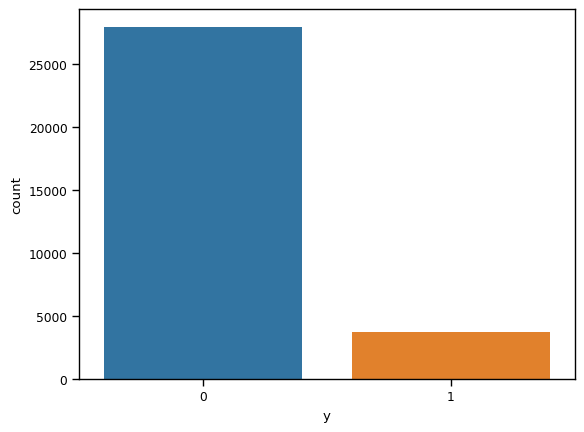

In [208]:
sns.countplot(data=train, x='y')

In [209]:
train['y'].value_counts(normalize=True)


y
0    0.883022
1    0.116978
Name: proportion, dtype: float64

Analysing th 'Job' variable

In [210]:
#Frequency table
train['job'].value_counts()

job
blue-collar      6866
management       6530
technician       5306
admin.           3662
services         2879
retired          1590
self-employed    1076
entrepreneur     1044
unemployed        918
housemaid         893
student           677
unknown           206
Name: count, dtype: int64

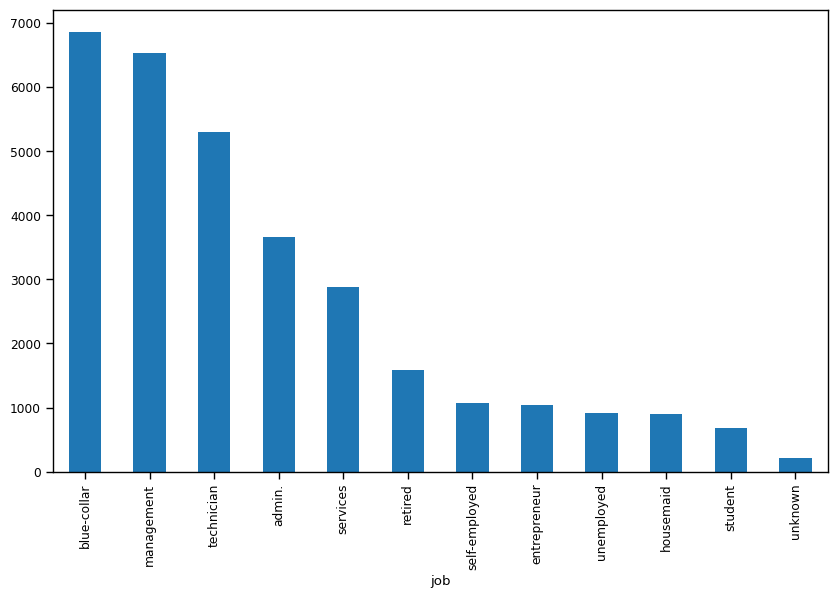

In [211]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [212]:
#Analysis of 'marital' status
train['marital'].value_counts()

marital
married     19049
single       8966
divorced     3632
Name: count, dtype: int64

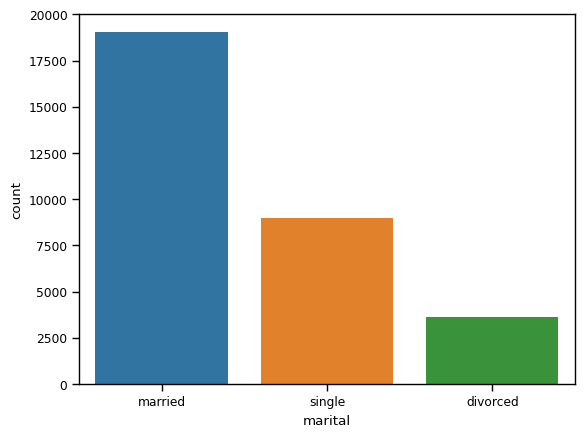

In [213]:
sns.countplot(data=train, x='marital');

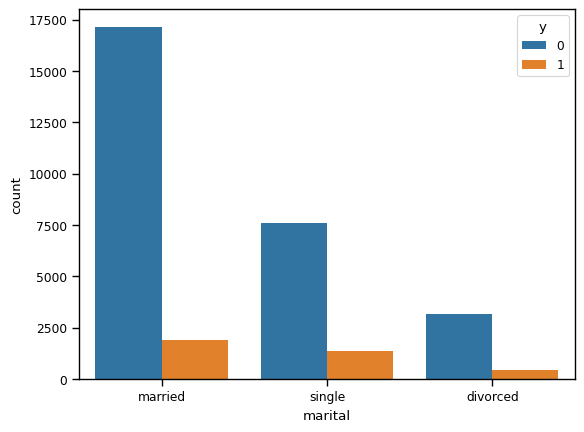

In [214]:
sns.countplot(data=train, x='marital', hue='y');

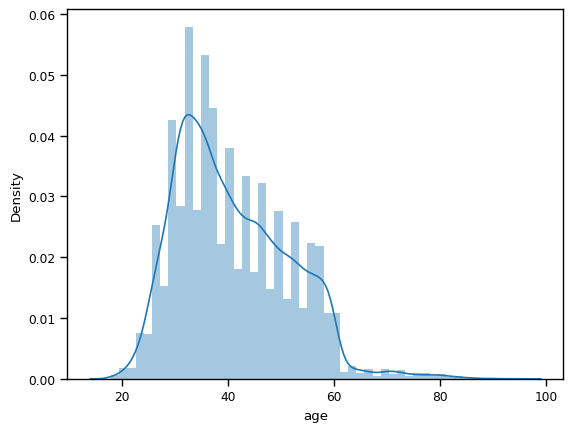

In [215]:
#Analyzing the 'age' variable

sns.distplot(train['age']);

Bivariate Analysis

In [216]:
#job vs y
print(pd.crosstab(train['job'],train['y']))

y                 0    1
job                     
admin.         3210  452
blue-collar    6375  491
entrepreneur    952   92
housemaid       820   73
management     5610  920
retired        1239  351
self-employed   958  118
services       2616  263
student         473  204
technician     4734  572
unemployed      779  139
unknown         179   27


In [217]:
job = pd.crosstab(train['job'],train['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

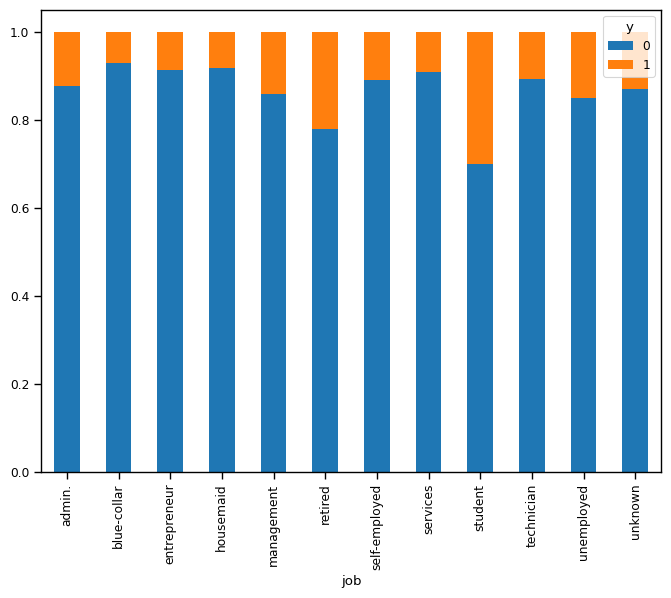

In [218]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [219]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['y'])

y,0,1
marital,,
divorced,3185,447
married,17152,1897
single,7608,1358


In [220]:
marital = pd.crosstab(train['marital'], train['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,0,1
marital,,
divorced,0.876927,0.123073
married,0.900415,0.099585
single,0.848539,0.151461


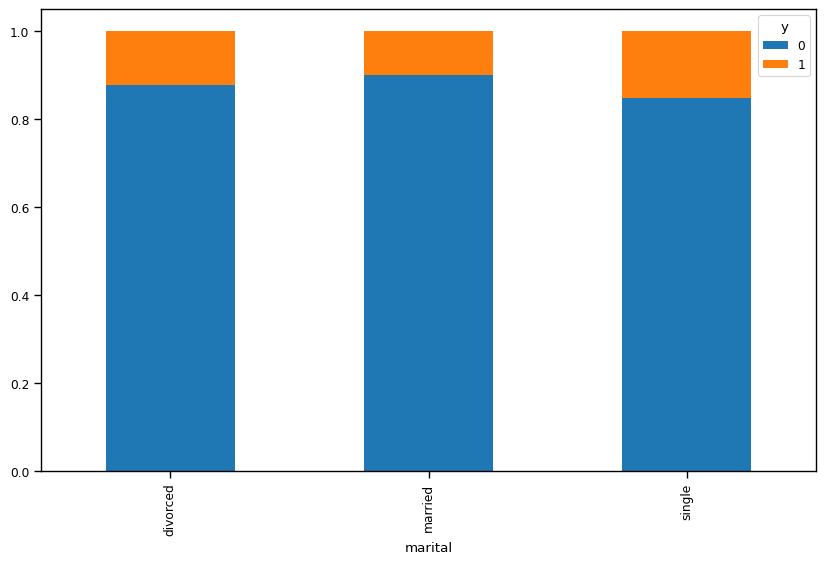

In [221]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

In [222]:
#default vs subscription
pd.crosstab(train['default'], train['y'])

y,0,1
default,,
no,27413,3670
yes,532,32


In [223]:
dflt = pd.crosstab(train['default'], train['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,0,1
default,,
no,0.881929,0.118071
yes,0.943262,0.056738


<Axes: xlabel='default'>

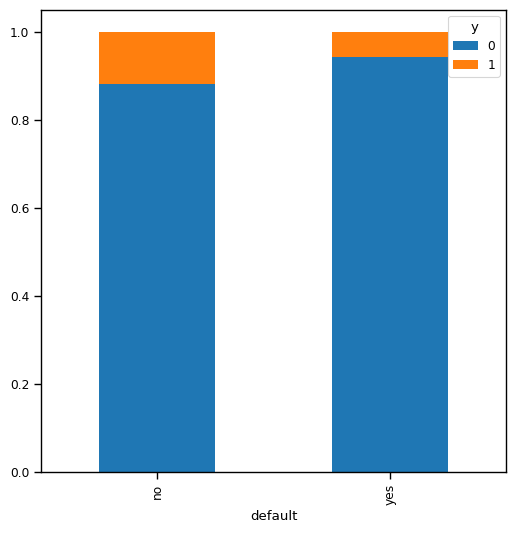

In [224]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

In [225]:
# Converting the target variables into 0s and 1s
train['y'].replace('no', 0,inplace=True)
train['y'].replace('yes', 1,inplace=True)

In [226]:
train['y']

0        0
1        0
2        0
3        0
4        0
        ..
31642    0
31643    0
31644    0
31645    0
31646    0
Name: y, Length: 31647, dtype: int64

In [227]:
# Select only numeric columns
numeric_columns = train.select_dtypes(include=['number'])

# Compute correlation matrix
tc = numeric_columns.corr()

In [228]:
tc

,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,0.014725,0.071655,-0.058056,0.013527,-0.103685,0.435165,0.252383,0.293029
age,0.014725,1.000000,0.091774,-0.009514,-0.007917,0.008493,-0.026525,-0.001562,0.019217
balance,0.071655,0.091774,1.000000,0.001783,0.019488,-0.014443,0.003833,0.017290,0.056386
day,-0.058056,-0.009514,0.001783,1.000000,-0.030451,0.158770,-0.093247,-0.047053,-0.026452
duration,0.013527,-0.007917,0.019488,-0.030451,1.000000,-0.087565,-0.006542,-0.000636,0.398404
campaign,-0.103685,0.008493,-0.014443,0.158770,-0.087565,1.000000,-0.088852,-0.031500,-0.072185
pdays,0.435165,-0.026525,0.003833,-0.093247,-0.006542,-0.088852,1.000000,0.428186,0.098897
previous,0.252383,-0.001562,0.017290,-0.047053,-0.000636,-0.031500,0.428186,1.000000,0.084945
y,0.293029,0.019217,0.056386,-0.026452,0.398404,-0.072185,0.098897,0.084945,1.000000


<Axes: >

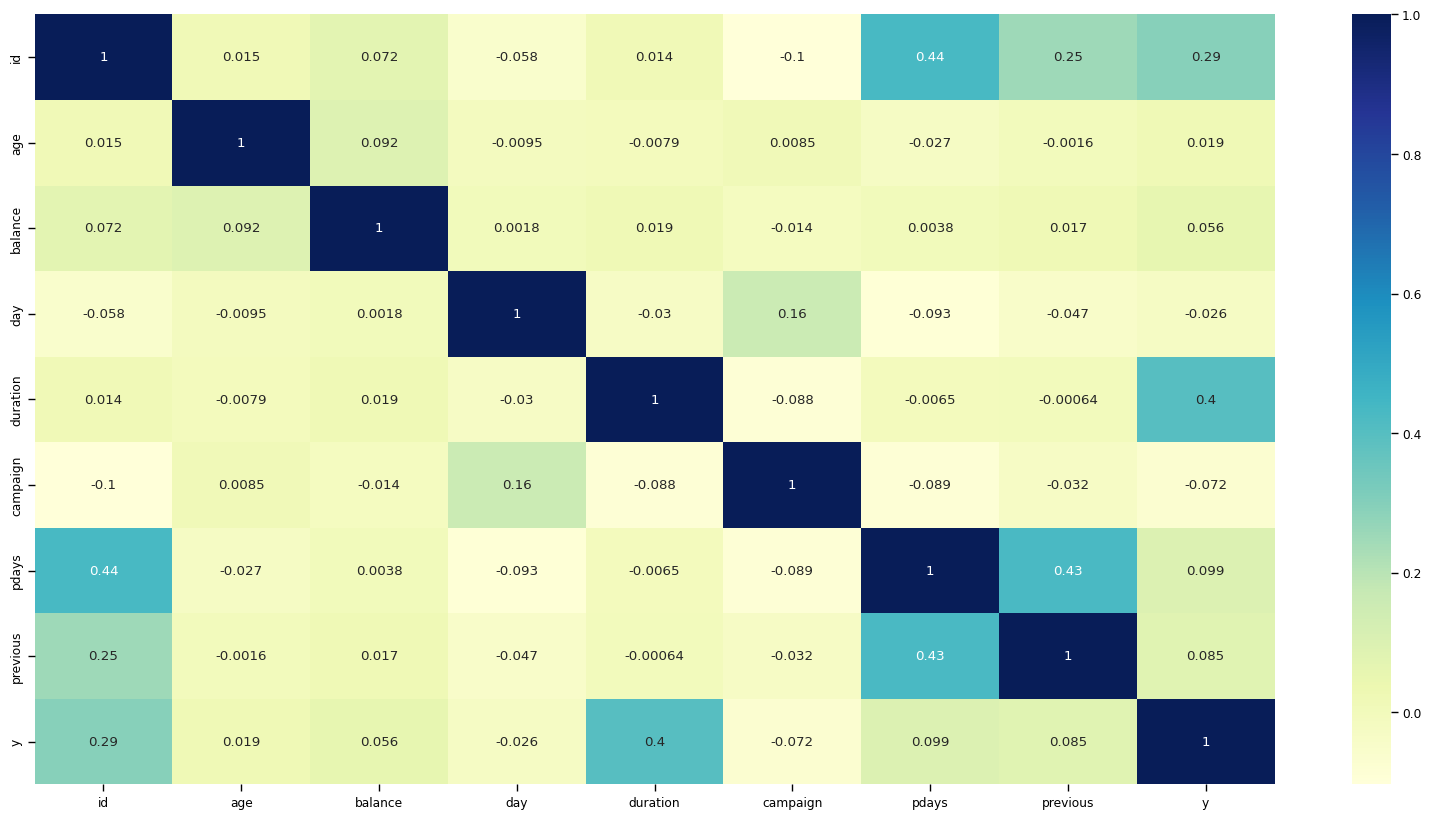

In [255]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

Model Building

In [ ]:
target = train['y']
train = train.drop('y', axis=1)

In [ ]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [ ]:
#fitting the data into the model
lreg.fit(X_train,y_train)

In [ ]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

In [239]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [242]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [243]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [244]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9053712480252765

In [245]:
test = pd.get_dummies(test)
test.head()

,id,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,37736,40,973,14,449,1,-1,0,False,True,...,False,False,True,False,False,False,False,False,False,True
1,44333,35,154,29,200,4,181,2,False,False,...,False,False,False,False,False,False,True,False,False,False
2,4433,38,736,20,775,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,38726,35,205,15,1313,7,312,1,False,True,...,False,False,True,False,False,False,True,False,False,False
4,38582,44,532,15,550,2,340,2,False,False,...,False,False,True,False,False,False,True,False,False,False


In [246]:
test_pred = clf.predict(test)
test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [247]:
from sklearn.metrics import accuracy_score

In [248]:
from sklearn.metrics import f1_score


In [249]:
submissions = pd.DataFrame()

In [250]:
submissions['id'] = test['id']
submissions['y'] = test_pred

In [251]:
submissions['id']

0        37736
1        44333
2         4433
3        38726
4        38582
         ...  
13559    15914
13560    20623
13561    41685
13562    32750
13563    37156
Name: id, Length: 13564, dtype: int64

In [252]:
submissions['y']

0        0
1        0
2        0
3        1
4        0
        ..
13559    0
13560    1
13561    1
13562    0
13563    0
Name: y, Length: 13564, dtype: int64

In [253]:
submissions.to_csv('submission file.csv', header=True, index=False)

In [254]:
print("Length of true labels array:", len(true_labels))
print("Length of predicted labels array:", len(predicted_labels))

Length of true labels array: 1
Length of predicted labels array: 13564
